In [19]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

image_data = nib.load('../images/FLAIR.nii.gz')
im = image_data.get_fdata()
image_data_2 = nib.load('../images/FLAIR_V2.nii.gz')

In [24]:


def histogram_matching(imgOrigin, imgTarget):
    # Obtener los datos de las imágenes
    data_orig = imgOrigin.get_fdata()
    data_target = imgTarget.get_fdata()

    # Redimensionar los datos en un solo arreglo 1D
    flat_orig = data_orig.flatten()
    flat_target = data_target.flatten()

    # Calcular los histogramas acumulativos
    hist_orig, bins = np.histogram(flat_orig, bins=256, range=(0, 255), density=True)
    hist_orig_cumulative = hist_orig.cumsum()
    hist_target, _ = np.histogram(flat_target, bins=256, range=(0, 255), density=True)
    hist_target_cumulative = hist_target.cumsum()

    # Ajustar los valores extremos
    min_value = min(flat_orig.min(), flat_target.min())
    max_value = max(flat_orig.max(), flat_target.max())

    # Mapear los valores de la imagen de origen a los valores de la imagen objetivo
    lut = np.interp(hist_orig_cumulative, hist_target_cumulative, bins[:-1])

    # Aplicar el mapeo a los datos de la imagen de origen
    data_matched = np.interp(data_orig, bins[:-1], lut)

    # Ajustar los valores extremos nuevamente
    data_matched = np.clip(data_matched, min_value, max_value)

    return data_matched


In [25]:
res = histogram_matching(image_data, image_data_2)

(array([22946., 18198., 15654., 13429., 12585., 11928., 11313., 10936.,
        10831., 10602., 10736., 10372., 10304., 10295., 10147.,  9987.,
         9924.,  9814.,  9650.,  9705.,  9107.,  9088.,  9043.,  8752.,
         8618.,  8473.,  8412.,  8395.,  8107.,  7959.,  8052.,  7678.,
         7735.,  7610.,  7744.,  7582.,  7541.,  7709.,  7720.,  7735.,
         7997.,  7749.,  8208.,  8035.,  8429.,  8452.,  8666.,  9238.,
        10135., 11355., 12979., 14748., 17598., 20572., 23144., 26798.,
        28619., 30038., 30526., 30185., 28390., 26363., 23767., 20580.,
        18235., 15218., 13078., 10884.,  9311.,  7866.,  6774.,  5849.,
         5266.,  4535.,  4300.,  3940.,  3789.,  3317.,  3367.,  3257.,
         3105.,  3004.,  2916.,  2772.,  2709.,  2687.,  2746.,  2504.,
         2553.,  2408.,  2388.,  2401.,  2251.,  2264.,  2155.,  2270.,
         2149.,  2163.,  2119., 88715.]),
 array([ 10.00002811,  12.4400669 ,  14.88010568,  17.32014446,
         19.76018324,  22.2002

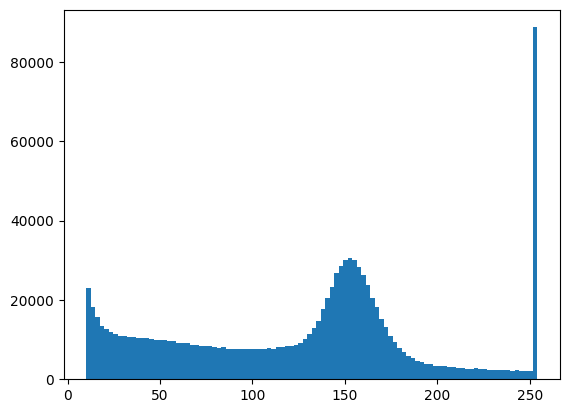

In [26]:
plt.hist(res[res>10].flatten(),100)

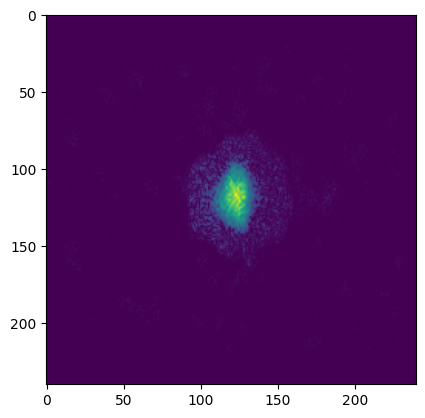

In [28]:
plt.imshow(res[:,:,47])

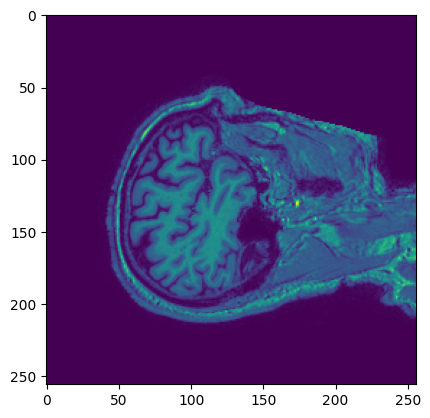

In [ ]:
plt.imshow(im[:,:,50])